# 주식데이터를 통한 RNN 구현

In [29]:
import numpy as np
import pandas as pd
from sklearn import svm, preprocessing
import matplotlib.pyplot as plt

In [30]:
stock = pd.read_csv('Google.csv')
stock.Date = pd.to_datetime(stock.Date)

In [31]:
stock.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


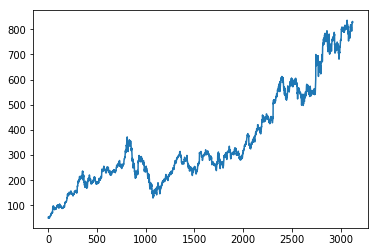

In [32]:
stock['Adj. Close'].plot()

In [33]:
Features = ['Open','High','Low','Close','Volume']

In [34]:
data = {'Date':stock['Date'],'Open':stock['Adj. Open'], 'High':stock['Adj. High'], 'Low':stock['Adj. Low'], 'Close':stock['Adj. Close'], 'Volume':stock['Adj. Volume']}

In [35]:
Stock = pd.DataFrame(data, columns = ['Date','Open','High','Low','Close','Volume'])

In [36]:
Stock.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [50]:
new_x = np.array(Stock[Features])[:-1,] # 맨 마지막 데이터는 제거
x_data = preprocessing.scale(new_x)
y_data = np.roll(Stock['Close'][:].tolist(),-1)[:-1] # 다음날 종가로 데이터 한칸씩 땡기기

In [51]:
new_x.shape

(3124, 5)

In [54]:
y_data = y_data.reshape(3124,1)